# 1er TP de sistemas inteligentes

Nombre:

Este trabajo práctico se aprueba completando más del 70% del mismo. Una vez completado el notebook y reenvielo al email 2329034@ucc.edu.ar. Importante: Asegurese que su correo haya llegado.

### Entender el problema

Siendo la clase positiva la indicación que el cliente cerró la cuenta ¿Qué le estaría pidiendo a mi clasificador qué tenga en cuenta si le pido un puntaje de recall alto?

<10%>
Respuesta:

Partiendo de la base que el recall podría definirse como "el grado de seguridad que tiene mi modelo de que no hay verdaderos positivos fuera de los marcados como positivos por el modelo, es decir, no importa que tanto me equivoque en la predicción (clasificar falsos como verdaderos), solo importa que no haya etiquetado verdaderos como falsos", el objetivo de mi clasificador es traer al mayor número de clientes que hayan cerrado la cuenta (sin importar el caso en que el cliente no haya cerrado la cuenta).

### Obtención de datos
Importe las librerías a utilizar:

In [1]:
import pandas as pd

Importe los datos:

In [2]:
url = "https://gitlab.com/francisco.arduh/datasets/-/raw/main/Churn_Modelling.csv"
df = pd.read_csv(url)

<10%> Realice una exploración de los datos, compruebe si existe faltante de datos en alguna columna, que tipo de distribución tienen los datos, si alguna columna tiene muchos datos únicos.

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Como se puede observar, en este caso la columna "RowNumber" no me es útil ya que cumple la función de index en el DataFrame, además en este caso el customerId y el Surname no me brindan ningún tipo de utilidad al momento de conocer si cierra la cuenta o no, por lo que antes de continuar las voy a borrar.


In [4]:
df.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
pd.unique(df["Geography"])

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


array([[<AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>],
       [<AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>],
       [<AxesSubplot:title={'center':'IsActiveMember'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Exited'}>]], dtype=object)

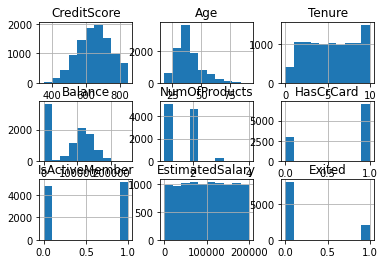

In [8]:
df.hist()

Como se puede observar, los datos están completos ya que todas las columnas poseen datos para cada una de las filas y los datos que estas contienen se repiten en su mayoría.

Es importante identificar que la columna Exited corresponde a la etiqueta para conocer los resultados de las predicciones (y)

<5%> Separar X_train, y_train, X_test, y_test

In [9]:
X = df.drop("Exited", axis = 1) # Quedarme los datos sin la etiqueta

y = df["Exited"]


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Procesado y transformación de datos
<10%> ¿Qué transformaciones debería aplicar? Especifique y justifique por grupo de columnas.

Por ejemplo: columna A, B y C aplicaría transformación X porque ...

Escriba los nombres de las columna en una lista por cada grupo:

Tanto en X_train y X_test:
   - Columnas Geography y Gender les voy a aplicar una transformación de OneHotEncoder para pasar las columnas con datos categóricos a datos que el modelo pueda entender, en el caso de Geography utilizo este Encoder y no otro porque en primer lugar solo hay 3 países posibles y porque no quiero que el modelo asocie el número otorgado a cada país como una escala de mejor o peor.
   - Voy a aplicar un escalado a los datos para que todos se encuentren dentro del mismo orden, de lo contrario el modelo puede darle mas importancia a una columna que a otra por una diferencia mas grande en la diferencia entre datos.


<15%> A continuación escriba el código para realizar las transformaciones 

In [11]:
from sklearn.preprocessing import OneHotEncoder

oneHotEncoder = OneHotEncoder()

gender_train = oneHotEncoder.fit_transform(X_train[["Gender"]])

print("Resultado de los labels: ", oneHotEncoder.get_feature_names_out())

gender_train_arr = gender_train.toarray().T # Giro 90° la matriz para poder seleccionar todos los datos con un único índice

X_train.insert(2, "Female", gender_train_arr[0]) 
X_train.insert(3, "Male", gender_train_arr[1])

print("X_train Transformado")
X_train.head()


Resultado de los labels:  ['Gender_Female' 'Gender_Male']
X_train Transformado


,CreditScore,Geography,Female,Male,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,686,France,0.0,1.0,Male,32,6,0.00,2,1,1,179093.26
1561,632,Germany,0.0,1.0,Male,42,4,119624.60,2,1,1,195978.86
1670,559,Spain,0.0,1.0,Male,24,3,114739.92,1,1,0,85891.02
6087,561,France,1.0,0.0,Female,27,9,135637.00,1,1,0,153080.40
6669,517,France,0.0,1.0,Male,56,9,142147.32,1,0,0,39488.04


In [12]:
gender_test = oneHotEncoder.fit_transform(X_test[["Gender"]])

print("Resultado de los labels: ", oneHotEncoder.get_feature_names_out())

gender_test_arr = gender_test.toarray().T 

X_test.insert(2, "Female", gender_test_arr[0]) 
X_test.insert(3, "Male", gender_test_arr[1])

print("X_test Transformado")
X_test.head()

Resultado de los labels:  ['Gender_Female' 'Gender_Male']
X_test Transformado


,CreditScore,Geography,Female,Male,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,596,Germany,0.0,1.0,Male,32,3,96709.07,2,0,0,41788.37
4684,623,France,0.0,1.0,Male,43,1,0.00,2,1,1,146379.30
1731,601,Spain,1.0,0.0,Female,44,4,0.00,2,1,0,58561.31
4742,506,Germany,0.0,1.0,Male,59,8,119152.10,2,1,1,170679.74
4521,560,Spain,1.0,0.0,Female,27,7,124995.98,1,1,1,114669.79


Ahora que ya tengo transformado el género voy a transformar los países de los clientes.

In [13]:
geo_train = oneHotEncoder.fit_transform(X_train[["Geography"]])

print("Resultado de los labels: ", oneHotEncoder.get_feature_names_out())

geo_train_arr = geo_train.toarray().T

X_train.insert(2, "France", geo_train_arr[0]) 
X_train.insert(3, "Germany", geo_train_arr[1])
X_train.insert(4, "Spain", geo_train_arr[2])

print("X_train Transformado")
X_train.head()


Resultado de los labels:  ['Geography_France' 'Geography_Germany' 'Geography_Spain']
X_train Transformado


,CreditScore,Geography,France,Germany,Spain,Female,Male,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,686,France,1.0,0.0,0.0,0.0,1.0,Male,32,6,0.00,2,1,1,179093.26
1561,632,Germany,0.0,1.0,0.0,0.0,1.0,Male,42,4,119624.60,2,1,1,195978.86
1670,559,Spain,0.0,0.0,1.0,0.0,1.0,Male,24,3,114739.92,1,1,0,85891.02
6087,561,France,1.0,0.0,0.0,1.0,0.0,Female,27,9,135637.00,1,1,0,153080.40
6669,517,France,1.0,0.0,0.0,0.0,1.0,Male,56,9,142147.32,1,0,0,39488.04


In [14]:
geo_test= oneHotEncoder.fit_transform(X_test[["Geography"]])

print("Resultado de los labels: ", oneHotEncoder.get_feature_names_out())

geo_test_arr = geo_test.toarray().T

X_test.insert(2, "France", geo_test_arr[0]) 
X_test.insert(3, "Germany", geo_test_arr[1])
X_test.insert(4, "Spain", geo_test_arr[2])

print("X_train Transformado")
X_test.head()


Resultado de los labels:  ['Geography_France' 'Geography_Germany' 'Geography_Spain']
X_train Transformado


,CreditScore,Geography,France,Germany,Spain,Female,Male,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,596,Germany,0.0,1.0,0.0,0.0,1.0,Male,32,3,96709.07,2,0,0,41788.37
4684,623,France,1.0,0.0,0.0,0.0,1.0,Male,43,1,0.00,2,1,1,146379.30
1731,601,Spain,0.0,0.0,1.0,1.0,0.0,Female,44,4,0.00,2,1,0,58561.31
4742,506,Germany,0.0,1.0,0.0,0.0,1.0,Male,59,8,119152.10,2,1,1,170679.74
4521,560,Spain,0.0,0.0,1.0,1.0,0.0,Female,27,7,124995.98,1,1,1,114669.79


Ahora ya tengo todos los datos categoricos transformados, voy a eliminar la columna original de los datos

In [15]:
X_train.drop(["Geography", "Gender"], axis = 1, inplace = True)



print("X_train sin escalar")
X_train.head()


X_train sin escalar


,CreditScore,France,Germany,Spain,Female,Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,686,1.0,0.0,0.0,0.0,1.0,32,6,0.00,2,1,1,179093.26
1561,632,0.0,1.0,0.0,0.0,1.0,42,4,119624.60,2,1,1,195978.86
1670,559,0.0,0.0,1.0,0.0,1.0,24,3,114739.92,1,1,0,85891.02
6087,561,1.0,0.0,0.0,1.0,0.0,27,9,135637.00,1,1,0,153080.40
6669,517,1.0,0.0,0.0,0.0,1.0,56,9,142147.32,1,0,0,39488.04


In [16]:
X_test.drop(["Geography", "Gender"], axis = 1, inplace = True)

print("X_test sin escalar")
X_test.head()

X_test sin escalar


,CreditScore,France,Germany,Spain,Female,Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,596,0.0,1.0,0.0,0.0,1.0,32,3,96709.07,2,0,0,41788.37
4684,623,1.0,0.0,0.0,0.0,1.0,43,1,0.00,2,1,1,146379.30
1731,601,0.0,0.0,1.0,1.0,0.0,44,4,0.00,2,1,0,58561.31
4742,506,0.0,1.0,0.0,0.0,1.0,59,8,119152.10,2,1,1,170679.74
4521,560,0.0,0.0,1.0,1.0,0.0,27,7,124995.98,1,1,1,114669.79


Ahora voy a escalar todos los datos.

In [17]:
X_train

,CreditScore,France,Germany,Spain,Female,Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,686,1.0,0.0,0.0,0.0,1.0,32,6,0.00,2,1,1,179093.26
1561,632,0.0,1.0,0.0,0.0,1.0,42,4,119624.60,2,1,1,195978.86
1670,559,0.0,0.0,1.0,0.0,1.0,24,3,114739.92,1,1,0,85891.02
6087,561,1.0,0.0,0.0,1.0,0.0,27,9,135637.00,1,1,0,153080.40
6669,517,1.0,0.0,0.0,0.0,1.0,56,9,142147.32,1,0,0,39488.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,1.0,0.0,0.0,0.0,1.0,54,8,69712.74,1,1,1,69381.05
5191,682,1.0,0.0,0.0,1.0,0.0,58,1,0.00,1,1,1,706.50
5390,735,1.0,0.0,0.0,1.0,0.0,38,1,0.00,3,0,0,92220.12
860,667,1.0,0.0,0.0,0.0,1.0,43,8,190227.46,1,1,0,97508.04


In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_array_scaled = scaler.fit_transform(X_train)

X_train_scaled = pd.DataFrame(X_train_array_scaled, columns = ["CreditScore", "France", "Germany", "Spain", "Female", 
                                                         "Male", "Age","Tenure","Balance", "NumOfProducts", 
                                                         "HasCrCard", "IsActiveMember", "EstimatedSalary"])

print("X_train_scaled")

X_train_scaled.head()

X_train_scaled


,CreditScore,France,Germany,Spain,Female,Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.672,1.0,0.0,0.0,0.0,1.0,0.189189,0.6,0.000000,0.333333,1.0,1.0,0.895550
1,0.564,0.0,1.0,0.0,0.0,1.0,0.324324,0.4,0.476786,0.333333,1.0,1.0,0.980029
2,0.418,0.0,0.0,1.0,0.0,1.0,0.081081,0.3,0.457317,0.000000,1.0,0.0,0.429261
3,0.422,1.0,0.0,0.0,1.0,0.0,0.121622,0.9,0.540606,0.000000,1.0,0.0,0.765408
4,0.334,1.0,0.0,0.0,0.0,1.0,0.513514,0.9,0.566554,0.000000,0.0,0.0,0.197107


In [19]:
X_test_array_scaled = scaler.transform(X_test) 


X_test_scaled = pd.DataFrame(X_test_array_scaled, columns = ["CreditScore", "France", "Germany", "Spain", "Female", 
                                                         "Male", "Age","Tenure","Balance", "NumOfProducts", 
                                                         "HasCrCard", "IsActiveMember", "EstimatedSalary"])
print("X_test_scaled")

X_test_scaled.head()

X_test_scaled


,CreditScore,France,Germany,Spain,Female,Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.492,0.0,1.0,0.0,0.0,1.0,0.189189,0.3,0.385452,0.333333,0.0,0.0,0.208616
1,0.546,1.0,0.0,0.0,0.0,1.0,0.337838,0.1,0.000000,0.333333,1.0,1.0,0.731883
2,0.502,0.0,0.0,1.0,1.0,0.0,0.351351,0.4,0.000000,0.333333,1.0,0.0,0.292531
3,0.312,0.0,1.0,0.0,0.0,1.0,0.554054,0.8,0.474902,0.333333,1.0,1.0,0.853458
4,0.420,0.0,0.0,1.0,1.0,0.0,0.121622,0.7,0.498194,0.000000,1.0,1.0,0.573241


Ahora tengo todos los datos transformados y escalados, puedo pasar a ver las correlaciones para saber que datos influyen a la hora de la decisión.

### Selección de modelo y entrenamiento
 


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

cla_log = LogisticRegression()

cla_rf = RandomForestClassifier()

<15%>Utilice validación cruzada para evaluar los modelos que se importaron. Utilice el de area bajo la curva roc mas alto.
Utilizar el metodo "cross_val_predict", tenga en cuenta que la variable, "method" para el LogisticRegression es "decision_function" y para RandomForestClassifier es "predict_proba" (ver clase o libro)


In [21]:
from sklearn.model_selection import cross_val_predict

scores_log = cross_val_predict(cla_log, X_train_scaled, y_train,
                         method='decision_function', cv=10)

print("Scores: ", scores_log)
print("Mean:", scores_log.mean())
print("Standard deviation:", scores_log.std())

Scores:  [-3.35077696 -1.4957231  -2.24392673 ... -1.4392244  -0.98829212
 -0.75840453]
Mean: -1.620724385542907
Standard deviation: 1.0233151775514027


In [22]:
scores_log[scores_log>0]

array([9.49159406e-01, 2.51397155e-01, 4.24062990e-05, 7.20908659e-01,
       1.15830172e+00, 3.24017021e-01, 1.23824049e+00, 8.92723627e-02,
       1.96632459e-01, 2.13922678e-01, 1.15612190e+00, 3.34509858e-01,
       8.92496504e-02, 1.21471711e+00, 3.21077106e-01, 1.02128587e-01,
       1.89600942e-01, 3.08793922e-01, 1.22772632e-01, 3.18113123e-02,
       6.53793890e-01, 1.19670679e+00, 4.90275651e-01, 2.49298884e-01,
       8.10045480e-02, 2.26685397e-02, 6.59316735e-01, 2.17891654e-01,
       1.10632685e-01, 9.19417194e-01, 2.05665902e-01, 4.34138913e-01,
       2.10452295e+00, 3.90598478e-01, 1.79342098e-01, 6.06370038e-01,
       1.59797441e+00, 1.57909626e-01, 7.07052825e-01, 6.79662237e-02,
       4.07652327e-01, 5.30047287e-02, 1.48301192e-01, 2.32755883e-01,
       1.63839011e-01, 1.55934687e-01, 1.21859748e-01, 1.15436155e+00,
       2.23887430e-01, 3.18128056e-01, 7.97381889e-01, 1.35501380e-01,
       6.16927114e-01, 1.90206328e-01, 1.49454218e-03, 1.22666784e-02,
      

In [23]:
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_train, scores_log)
def plot_roc_curve(fpr, tpr, label= None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1],[0,1], 'k--')
    plt.grid()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    [...]
    
plot_roc_curve(fpr,tpr)
plt.show()

NameError: name 'roc_curve' is not defined

In [ ]:
scores_rf = cross_val_predict(cla_rf, X_train_scaled, y_train,
                         method='predict_proba', cv=10)

print("Scores: ", scores_rf)
print("Mean:", scores_rf.mean())
print("Standard deviation:", scores_rf.std())

Scores:  [[0.99 0.01]
 [0.92 0.08]
 [0.83 0.17]
 ...
 [0.33 0.67]
 [0.6  0.4 ]
 [0.58 0.42]]
Mean: 0.5
Standard deviation: 0.37056558124035205


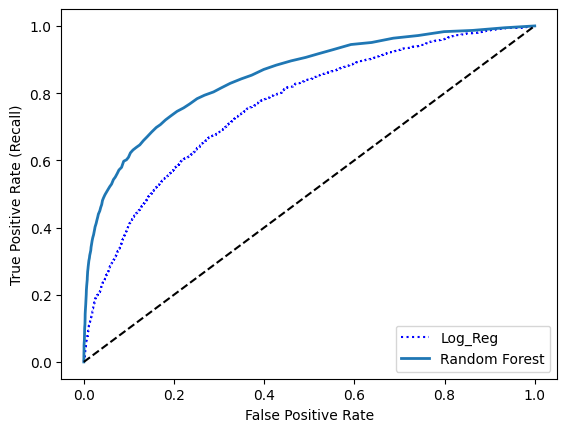

In [ ]:
from sklearn.metrics import roc_curve

y_scores_forest = scores_rf[:,1]

fpr_forest,tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)
plt.plot(fpr, tpr, "b:", label="Log_Reg")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc = "lower right")
plt.grid()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.show()


<10%>¿Por qué lo eligiria el modelo por el area bajo la curva roc?

En este caso elegiría el modelo Random Forest ya que su área bajo la curva ROC es mayor que la de Log_Reg, lo cual significa que tiene un mayor recall, lo cual es lo que le pido a mi modelo.

<15>Utilice el metodo grid search sobre el modelo elegido  
en caso de ser LogisticRegression
```
param_grid = [
{'C': [0.1, 1, 10], 'penalty': ['elasticnet'], 'l1_ratio': [0.,0.2,0.4]}
]
```
en caso de ser RandomForest utilize:
```
param_grid = [
{'n_estimators': [30, 100], 'max_features': [2, 4, 6, 8]}
]
```
¿Cuál es el sentido de hacer esto?

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [30, 100], 'max_features': [2, 4, 6, 8]}
]

grid_search = GridSearchCV(cla_rf, param_grid, cv = 5,
                          scoring = 'roc_auc',
                          return_train_score = True)

grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [30, 100]}],
             return_train_score=True, scoring='roc_auc')

In [ ]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 100}

In [ ]:
grid_search.best_score_

0.8520493994699152

Utilizamos GridSearchCV para probar los mejores parámetros para el modelo elegido.

<5%>Imprima el valor de accuracy, recall, precision, f1 y auc_roc, en las regiones de validación

In [ ]:
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(cla_rf, X_train_scaled, y_train, cv = 3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx


array([[6126,  230],
       [ 895,  749]])

In [ ]:
print("Accuracy:", sklearn.metrics.accuracy_score(y_train, y_train_pred))

print("Recall:", sklearn.metrics.recall_score(y_train, y_train_pred))

print("F1:", sklearn.metrics.f1_score(y_train, y_train_pred))

print("Auc_Roc:", sklearn.metrics.roc_auc_score(y_train, y_train_pred))
      

Accuracy: 0.859375
Recall: 0.4555961070559611
F1: 0.571101791841403
Auc_Roc: 0.7097049131881442


<5%>Imprima el valor de accuracy, recall, precision, f1 y auc_roc, en las regiones de test, 
¿Los números son parecido a lo obtenido en las regiones de validación? ¿A qué puede deberse?

In [ ]:
y_test_pred = cross_val_predict(cla_rf, X_test_scaled, y_test, cv = 3)
conf_mx = confusion_matrix(y_test, y_test_pred)
conf_mx

array([[1543,   64],
       [ 247,  146]])

In [ ]:
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, y_test_pred))

print("Recall:", sklearn.metrics.recall_score(y_test, y_test_pred))

print("F1:", sklearn.metrics.f1_score(y_test, y_test_pred))

print("Auc_Roc:", sklearn.metrics.roc_auc_score(y_test, y_test_pred))
      

Accuracy: 0.8445
Recall: 0.37150127226463103
F1: 0.48424543946932014
Auc_Roc: 0.6658377549873249
